### This file plots the processed csv files with matplotlib

Note: manually select date and file name in the corresponding section (either cpu, netsend or netrecv)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [15]:
date = '2018-10-28_21h33'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/' + date + '/'
worker_list = [8,16,32,64]

In [4]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## CPU utilization plot

In [5]:
# read data into pandas dataframe
file_name = 'dstat_server_cpu_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,cpu_mean,cpu_std
0,12,8,3.782125,2.272125
1,12,16,7.051750,0.239000
2,24,8,10.543125,0.649125
3,24,16,11.953750,1.503500


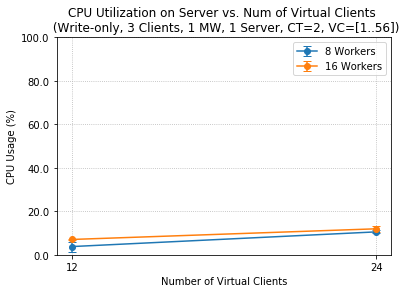

In [7]:
f = plt.figure()
plt.title("CPU Utilization on Server vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['cpu_mean']
    std = df_c_cut['cpu_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=100)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network send activity plot

In [5]:
# read data into pandas dataframe
file_name = 'dstat_server_netsend_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,netsend_mean,netsend_std
0,12,8,5.429447e+06,141193.875
1,12,16,5.618968e+06,6236.000
2,24,8,1.041549e+07,198411.750
3,24,16,9.967727e+06,61042.875


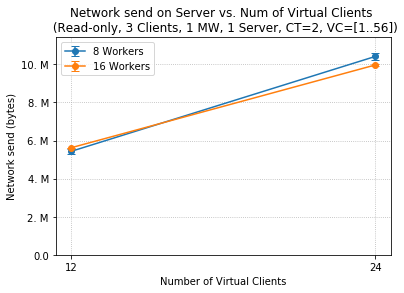

In [11]:
f = plt.figure()
plt.title("Network send on Server vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netsend_mean']
    std = df_c_cut['netsend_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network send (bytes)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netsend_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network recv activity plot

In [13]:
# read data into pandas dataframe
file_name = 'dstat_client_netrecv_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,netrecv_mean,netrecv_std
0,12,8,5.582829e+06,146031.375
1,12,16,5.714512e+06,11937.250
2,24,8,1.058452e+07,227425.000
3,24,16,1.003758e+07,25798.750


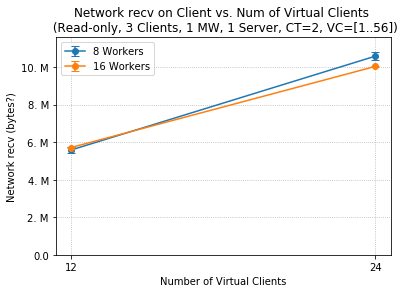

In [14]:
f = plt.figure()
plt.title("Network recv on Client vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netrecv_mean']
    std = df_c_cut['netrecv_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network recv (bytes?)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netrecv_mean']))
plt.legend()


ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/"+file_name[:-4]+".png", dpi = 150)